In [23]:
import pandas as pd

import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

from src.cleaning import get_clean_data

import altair as alt

In [2]:
import geopandas as gpd

<Axes: >

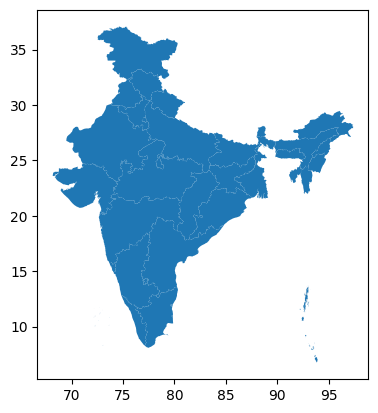

In [3]:
gdf = gpd.read_file("../data/shrug-pc11state-poly-shp/state.shp")
gdf.plot()

In [4]:
df = get_clean_data()

In [5]:
df.shape

(294658, 20)

In [6]:
df.iloc[6745]

id                                                            21123418
date                                               2018-03-05 00:00:00
ls_number                                                           16
ministry                            Micro,small and Medium Enterprises
question_type                                                Unstarred
question_text        (a) whether it is a fact that credit inflow to...
answer_text          MINISTER OF STATE (INDEPENDENT CHARGE) FOR MIC...
member                                   ADV. NARENDRA KESHAV SAWAIKAR
party                                                              BJP
state                                                              Goa
constituency                                                 South goa
constituency_type                                                  GEN
gender                                                            Male
subject                                  Credit Inflow for MSME Sector
link  

In [7]:
df.iloc[6742]

id                                                            21123718
date                                               2018-03-05 00:00:00
ls_number                                                           16
ministry                        Skill Development and Entrepreneurship
question_type                                                Unstarred
question_text        (a) the details of skill development centres o...
answer_text          (a) to (d) Pradhan Mantri Kaushal Vikas Yojana...
member                                        BHANU PRATAP SINGH VERMA
party                                                              BJP
state                                                    Uttar Pradesh
constituency                                                    Jalaun
constituency_type                                                   SC
gender                                                            Male
subject                    Irregularities in Skill Development Centres
link  

In [8]:
missing = df[df.isna().any(axis=1)]

In [9]:
df.columns

Index(['id', 'date', 'ls_number', 'ministry', 'question_type', 'question_text',
       'answer_text', 'member', 'party', 'state', 'constituency',
       'constituency_type', 'gender', 'subject', 'link', 'primary_state',
       'primary_party', 'year', 'month', 'day'],
      dtype='object')

In [10]:
df["primary_state"] = df["state"].str.split(",").str[0]

In [11]:
df["primary_party"] = df["party"].str.split(",").str[0]

In [12]:
df["primary_party"].unique()

array(['BJP', 'ADMK', 'AITC', 'YSRCP', 'CPM', 'TDP', 'SWP', 'TRS', 'BJD',
       'INC', 'KEC(M)', 'RSP', 'SDF', 'JMM', 'AIUDF', 'AIMIM', 'CPI',
       'SHS', 'LJP', 'IND', 'NCP', 'JD(U)', 'SP', 'PMK', 'AAAP', 'RJD',
       'JD(S)', 'SAD', 'INLD', 'IUML', 'BLSP', 'Nominated', 'NPP', 'AD',
       'NC', 'NPF', 'NPEP', 'JKPDP', 'SamSP', 'AINRC', 'BSP', 'DMK',
       'RLD', 'AIFB', 'AUDF', 'MDMK', 'AGP', 'BOPF', 'MUL', 'JKN', 'BVA',
       'HJC', 'VCK', 'RPI(A)', 'IFDP', 'TD', 'KEC', 'LJNSP', 'NLP',
       'CPI(M)', 'MNF', 'SAD(M)', 'FBL', 'JP', 'BBM', 'Inc', 'ABLTC',
       'PWPI', 'MADMK', 'AIDMK', 'HVC', 'MSCP', 'CPI(ML)(L)', 'ABJS',
       'KVSB', 'BNP', 'NDPP'], dtype=object)

In [13]:
df.tail()

,id,date,ls_number,ministry,question_type,question_text,answer_text,member,party,state,constituency,constituency_type,gender,subject,link,primary_state,primary_party,year,month,day
294988,3355307916,2018-12-31,16,Steel,Unstarred,(a) whether the Government has introduced/prop...,THE MINISTER OF STATE FOR STEEL (SHRI VISHNU D...,UDASI SHIVAKUMAR CHANNABASAPPA,BJP,Karnataka,Haveri,GEN,Male,Steel Scrap Policy,https://loksabha.nic.in/Questions/QResult15.as...,Karnataka,BJP,2018,12,31
294989,3355308016,2018-12-31,16,"Micro,small and Medium Enterprises",Unstarred,"(a) the frequency at which, the list of items ...",MINISTER OF STATE (INDEPENDENT CHARGE) FOR MIC...,M CHANDRAKASI,ADMK,Tamil Nadu,Chidambaram,SC,Male,Reserved SME Products,https://loksabha.nic.in/Questions/QResult15.as...,Tamil Nadu,ADMK,2018,12,31
294990,3355308116,2018-12-31,16,Human Resource Development,Unstarred,(a) whether the Government intends to introduc...,MINISTER OF STATE IN THE MINISTRY OF HUMAN RES...,MEENAKASHI LEKHI,BJP,Delhi,New delhi,GEN,Female,Curriculum on Environment,https://loksabha.nic.in/Questions/QResult15.as...,Delhi,BJP,2018,12,31
294991,3356306816,2018-12-31,16,Labour and Employment,Unstarred,(a)the details of budget allocated under the C...,MINISTER OF STATE (IC) FOR LABOUR AND EMPLOYME...,"KIRRON KHER, SUSHMITA DEV, OM BIRLA","BJP, INC, BJP","Chandigarh, Assam, Rajasthan","Chandigarh, Silchar, Kota","GEN, GEN, GEN","Female, Female, Male",Central Sector Scheme for Rehabilitation of Bo...,https://loksabha.nic.in/Questions/QResult15.as...,Chandigarh,BJP,2018,12,31
294992,3350312316,2018-12-31,16,Commerce and Industry,Unstarred,(a) whether the Marine Products Export Develop...,THE MINISTER OF STATE IN THE MINISTRY OF COMME...,"REKHA, LALLU SINGH","BJP, BJP","Uttar Pradesh, Uttar Pradesh","Dhaurahra, Faizabad","GEN, GEN","Female, Male",MPEDA,https://loksabha.nic.in/Questions/QResult15.as...,Uttar Pradesh,BJP,2018,12,31


In [14]:
df.columns

Index(['id', 'date', 'ls_number', 'ministry', 'question_type', 'question_text',
       'answer_text', 'member', 'party', 'state', 'constituency',
       'constituency_type', 'gender', 'subject', 'link', 'primary_state',
       'primary_party', 'year', 'month', 'day'],
      dtype='object')

In [24]:
text_input = alt.param(
    name='userInput',
    value='',  # Default empty value
    bind=alt.binding_input(
        input='text',
        placeholder='Search for a word (e.g., "Apple")',
        name='Filter Text: '
    )
)

AttributeError: module 'altair' has no attribute 'binding_input'